In [1]:
import xarray as xr
import numpy as np

In [4]:
files = [
'BC_biomass_high_1849_2015_time_series.nc',
'BC_biomass_low_1849_2015_time_series.nc',
'C2H6_biomass_low_1849_2015_time_series.nc',
'C3H8_biomass_low_1849_2015_time_series.nc',
'C5H8_biomass_low_1849_2015_time_series.nc',
'CH4_biomass_low_1849_2015_time_series.nc',
'CO_biomass_low_1849_2015_time_series.nc',
'DMS_biomass_low_1849_2015_time_series.nc',
'HCHO_biomass_low_1849_2015_time_series.nc',
'Me2CO_biomass_low_1849_2015_time_series.nc',
'MeCHO_biomass_low_1849_2015_time_series.nc',
'MeOH_biomass_low_1849_2015_time_series.nc',
'Monoterp_biomass_low_1849_2015_time_series.nc',
'NH3_biomass_low_1849_2015_time_series.nc',
'NO_biomass_low_1849_2015_time_series.nc',
'NVOC_biomass_low_1849_2015_time_series.nc',
'OC_biomass_high_1849_2015_time_series.nc',
'OC_biomass_low_1849_2015_time_series.nc'
]

variables = [
'emissions_BC_biomass_high',
'emissions_BC_biomass_low',
'emissions_C2H6_biomass_low',
'emissions_C3H8_biomass_low',
'emissions_C5H8_biomass_low',
'emissions_CH4_biomass_low',
'emissions_CO_biomass_low',
'emissions_DMS_biomass_low',
'emissions_HCHO_biomass_low',
'emissions_Me2CO_biomass_low',
'emissions_MeCHO_biomass_low',
'emissions_MeOH_biomass_low',
'emissions_Monoterp_biomass_low',
'emissions_NH3_biomass_low',
'emissions_NO_biomass_low',
'emissions_NVOC_biomass_low',
'emissions_OC_biomass_high',
'emissions_OC_biomass_low'
]
disk = '/home/users/ptg21/biomass/'
for file,vari in zip(files,variables):
    names = file.split('_')
    outfile = names[0]+'_'+names[1]
    print(outfile+'\n')
    CMIP6_NO_anthro = xr.open_dataset(disk+file)
    CMIP6_NO_anthro_1995_2014 = CMIP6_NO_anthro.sel(time = slice('1994-12-01','2014-01-01'))
    CMIP6_NO_anthro_1995_data = CMIP6_NO_anthro_1995_2014.sel(time = slice('1994-12-01','1996-01-01'))[vari]
    const_1995_ems  = np.zeros((19*12+1,1,144,192))
    const_1995_ems[0,...] = CMIP6_NO_anthro_1995_data[-1,...]
    for ivar in range (0,19):
        const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,:,:] = CMIP6_NO_anthro_1995_data[1:]

    CMIP6_NO_anthro_const_1995 = CMIP6_NO_anthro_1995_2014.copy(deep=True)
    CMIP6_NO_anthro_const_1995[vari].data = const_1995_ems
    CMIP6_NO_anthro_const_1995.to_netcdf(disk+'1995_2014_'+vari+'.nc')

BC_biomass

BC_biomass

C2H6_biomass

C3H8_biomass

C5H8_biomass

CH4_biomass

CO_biomass

DMS_biomass

HCHO_biomass

Me2CO_biomass

MeCHO_biomass

MeOH_biomass

Monoterp_biomass

NH3_biomass

NO_biomass

NVOC_biomass

OC_biomass

OC_biomass



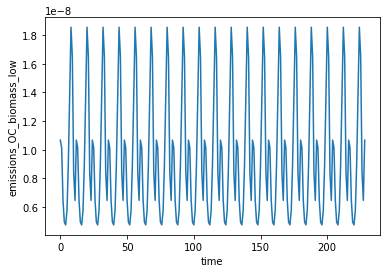

In [5]:
CMIP6_NO_anthro_const_1995[vari].resample(time='Y').sum(dim=['latitude','model_level_number','longitude']).plot()